https://github.com/ibm-watson-data-lab/pixiedust/wiki/Tutorial:-Using-Notebooks-with-PixieDust-for-Fast,-Flexible,-and-Easier-Data-Analysis-and-Experimentation

In [ ]:
#!pip install --user -U pixiedust requests matplotlib
import pixiedust

inspections = pixiedust.sampleData("https://opendata.lasvegasnevada.gov/resource/86jg-3buh.csv")

In [ ]:
display(inspections)

# Using pymongo and pixiedust

our server at 10.210.9.130 uses ssl with a self-signed certificate


In [ ]:
# install pymongo
#!pip install --user -U pymongo

In [35]:
#!conda install -y pymongo
import pymongo as pm
from pymongo.errors import ConnectionFailure
from time import sleep
from ssl import CERT_NONE


client = pm.MongoClient('10.210.9.130', ssl=True, ssl_cert_reqs=CERT_NONE,
                        username='strands', authSource='admin', authMechanism='SCRAM-SHA-1',
                        serverSelectionTimeoutMS=1500, password='Grum#Beere')
#client = pm.MongoClient('lcas.lincoln.ac.uk', port=80)
#try:
   # The ismaster command is cheap and does not require auth.


collection = client.aafy4_message_store.nav_stats

c= collection.find({'final_node': 'ChargingPoint'}).limit(1000)



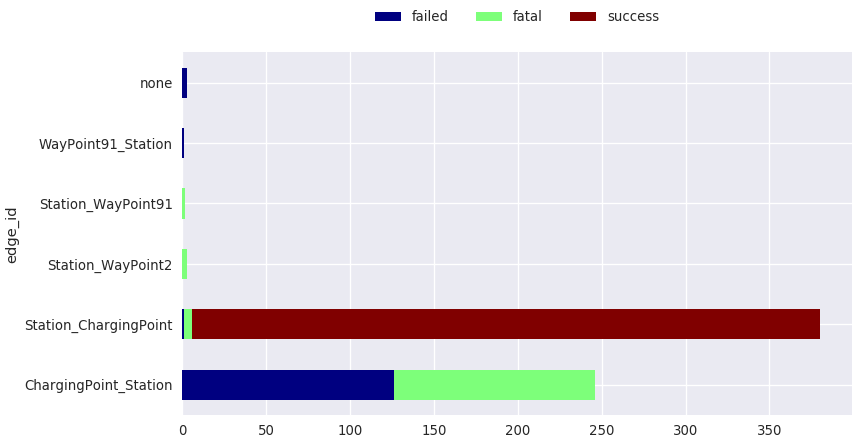

In [36]:
import pixiedust
items=[i for i in c]
display(items)
#for i in c:
#    display(i)

# Use rosbag with pixiedust

* needs to install ROS and somehow make it work with jupyter (loadenv)
* then needs to use rosbag_pandas
* then we are happy and can go

In [1]:
# You can use python inline. E.g. you can define functions to be used later:

# import environment and expose in jupyter env
# this only works when shellvars is installed as it is in L-CAS Juptyer images
# https://github.com/LCAS/jupyterhub-deploy-docker/blob/master/singleuser/Dockerfile#L100

import shellvars
from os import environ

def loadenv(filename='/opt/ros/kinetic/setup.bash'):
    vs = shellvars.get_vars(filename)
    for v in vs:
        print('%s=%s' % (v.decode("utf-8"), str(vs[v].decode("utf-8"))))
        environ[v.decode("utf-8")] = str(vs[v].decode("utf-8"))

# you can call these functions easily
# (This example is a good way to load environment variables from a config file)

loadenv('/opt/ros/kinetic/setup.bash')

ROS_ROOT=/opt/ros/kinetic/share/ros
ROS_PACKAGE_PATH=/opt/ros/kinetic/share
ROS_VERSION=1
LD_LIBRARY_PATH=/opt/ros/kinetic/lib
PATH=/opt/ros/kinetic/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin
ROS_DISTRO=kinetic
PYTHONPATH=/opt/ros/kinetic/lib/python2.7/dist-packages
PKG_CONFIG_PATH=/opt/ros/kinetic/lib/pkgconfig
CMAKE_PREFIX_PATH=/opt/ros/kinetic
ROS_ETC_DIR=/opt/ros/kinetic/etc/ros


In [8]:

# install marc-hanheide's own python3 version of rosbag_panda: https://github.com/marc-hanheide/RosbagPandas
#   - clone it
#   - run pip install --user -U . in it 
# tutorial at https://nimbus.unl.edu/2014/11/using-rosbag_pandas-to-analyze-rosbag-files/
#sudo apt-get install ros-kinetic-rosbag python-roslz4
def expand_sys_path():
    import sys
    from os import environ

    extra_paths = environ['PYTHONPATH'].split(':')
    sys.path.extend(extra_paths)

    new_path = []
    for p in sys.path:
        if not p in new_path:
            new_path.append(p)

    sys.path = new_path


expand_sys_path()

import rosbag
import pixiedust
from pprint import pprint
bag = rosbag.Bag('bag.bag')
topics = bag.get_type_and_topic_info()[1]

for t in topics:
    print(t, topics[t])

import rosbag_pandas

df = rosbag_pandas.bag_to_dataframe('bag.bag', include=['/amcl_pose'])



/amcl_pose TopicTuple(msg_type='geometry_msgs/PoseWithCovarianceStamped', message_count=13, connections=1, frequency=1.9929491585341719)
/odom TopicTuple(msg_type='nav_msgs/Odometry', message_count=419, connections=1, frequency=9.902923440886617)
/scan TopicTuple(msg_type='sensor_msgs/LaserScan', message_count=538, connections=1, frequency=10.022303624637692)
/sgt/status TopicTuple(msg_type='std_msgs/String', message_count=110, connections=1, frequency=13.112158034756892)
/track/status TopicTuple(msg_type='std_msgs/String', message_count=131, connections=1, frequency=18.056287278214132)


In [12]:
display(df)